# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [M. Farid Saputra]
- **Email:** [mfaridsptra08@gmail.com]
- **ID Dicoding:** [mfaridsptra]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap penggunaan sepeda?
- Apakah terdapat hari-hari atau periode tertentu dengan lonjakan penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/eferdee/analisis-data-1/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/eferdee/analisis-data-1/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Assessing Data `day.csv`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengecek tipe data setelah perubahan
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi:", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [9]:
# Identifikasi outlier dengan metode IQR
def identify_outliers(data, column):
    q25, q75 = data[column].quantile(0.25), data[column].quantile(0.75)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [10]:
# Mengidentifikasi outlier
outliers_hum_day = identify_outliers(day_df, 'hum')
outliers_windspeed_day = identify_outliers(day_df, 'windspeed')
outliers_casual_day = identify_outliers(day_df, 'casual')

print("Outliers pada kolom 'hum':", outliers_hum_day.shape[0])
print("Outliers pada kolom 'windspeed':", outliers_windspeed_day.shape[0])
print("Outliers pada kolom 'casual':", outliers_casual_day.shape[0])

Outliers pada kolom 'hum': 2
Outliers pada kolom 'windspeed': 13
Outliers pada kolom 'casual': 44


#### Assessing Data `hour.csv`

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [13]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
print("Jumlah data yang duplikat:", hour_df.duplicated().sum())
hour_df.describe()

Jumlah data yang duplikat: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
# Mengidentifikasi outlier
outliers_hum_hour = identify_outliers(hour_df, 'hum')
outliers_windspeed_hour = identify_outliers(hour_df, 'windspeed')
outliers_casual_hour = identify_outliers(hour_df, 'casual')
outliers_registered_hour = identify_outliers(hour_df, 'registered')
outliers_cnt_hour = identify_outliers(hour_df, 'cnt')

print("Outliers pada kolom 'hum':", outliers_hum_hour.shape[0])
print("Outliers pada kolom 'windspeed':", outliers_windspeed_hour.shape[0])
print("Outliers pada kolom 'casual':", outliers_casual_hour.shape[0])
print("Outliers pada kolom 'registered':", outliers_registered_hour.shape[0])
print("Outliers pada kolom 'cnt':", outliers_cnt_hour.shape[0])

Outliers pada kolom 'hum': 22
Outliers pada kolom 'windspeed': 342
Outliers pada kolom 'casual': 1192
Outliers pada kolom 'registered': 680
Outliers pada kolom 'cnt': 505


### Cleaning Data

#### Membersihkan Data `day.csv`

In [16]:
day_df_cleaned = day_df.copy()

# Menghapus outlier
day_df_cleaned = day_df_cleaned[~day_df_cleaned['hum'].isin(outliers_hum_day['hum'])]
day_df_cleaned = day_df_cleaned[~day_df_cleaned['windspeed'].isin(outliers_windspeed_day['windspeed'])]
day_df_cleaned = day_df_cleaned[~day_df_cleaned['casual'].isin(outliers_casual_day['casual'])]

In [17]:
print(day_df_cleaned.describe())

          instant                         dteday      season          yr  \
count  673.000000                            673  673.000000  673.000000   
mean   357.989599  2011-12-23 23:45:01.337295872    2.503715    0.475483   
min      1.000000            2011-01-01 00:00:00    1.000000    0.000000   
25%    175.000000            2011-06-24 00:00:00    1.000000    0.000000   
50%    349.000000            2011-12-15 00:00:00    3.000000    0.000000   
75%    545.000000            2012-06-28 00:00:00    4.000000    1.000000   
max    731.000000            2012-12-31 00:00:00    4.000000    1.000000   
std    212.108768                            NaN    1.123505    0.499770   

             mnth     holiday     weekday  workingday  weathersit        temp  \
count  673.000000  673.000000  673.000000  673.000000  673.000000  673.000000   
mean     6.557207    0.026746    2.962853    0.728083    1.404160    0.489420   
min      1.000000    0.000000    0.000000    0.000000    1.000000    0.0

#### Membersihkan Data `hour.csv`

In [18]:
hour_df_cleaned = hour_df.copy()

# Menghapus outlier
hour_df_cleaned = hour_df_cleaned[~hour_df_cleaned['hum'].isin(outliers_hum_hour['hum'])]
hour_df_cleaned = hour_df_cleaned[~hour_df_cleaned['windspeed'].isin(outliers_windspeed_hour['windspeed'])]
hour_df_cleaned = hour_df_cleaned[~hour_df_cleaned['casual'].isin(outliers_casual_hour['casual'])]
hour_df_cleaned = hour_df_cleaned[~hour_df_cleaned['registered'].isin(outliers_registered_hour['registered'])]
hour_df_cleaned = hour_df_cleaned[~hour_df_cleaned['cnt'].isin(outliers_cnt_hour['cnt'])]

In [19]:
print(hour_df_cleaned.describe())

            instant                         dteday        season  \
count  15220.000000                          15220  15220.000000   
mean    8445.179435  2011-12-22 22:40:20.183968512      2.485940   
min        1.000000            2011-01-01 00:00:00      1.000000   
25%     4111.750000            2011-06-25 00:00:00      1.000000   
50%     8274.500000            2011-12-16 00:00:00      2.000000   
75%    12753.250000            2012-06-20 00:00:00      3.000000   
max    17379.000000            2012-12-31 00:00:00      4.000000   
std     5025.796656                            NaN      1.124604   

                 yr          mnth            hr       holiday       weekday  \
count  15220.000000  15220.000000  15220.000000  15220.000000  15220.000000   
mean       0.476150      6.517871     11.162155      0.027464      2.991853   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000      3.000000      5.000000      0.000000      1.00

## Exploratory Data Analysis (EDA)

### Explore Data `day.csv`

In [20]:
day_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     673 non-null    int64         
 1   dteday      673 non-null    datetime64[ns]
 2   season      673 non-null    int64         
 3   yr          673 non-null    int64         
 4   mnth        673 non-null    int64         
 5   holiday     673 non-null    int64         
 6   weekday     673 non-null    int64         
 7   workingday  673 non-null    int64         
 8   weathersit  673 non-null    int64         
 9   temp        673 non-null    float64       
 10  atemp       673 non-null    float64       
 11  hum         673 non-null    float64       
 12  windspeed   673 non-null    float64       
 13  casual      673 non-null    int64         
 14  registered  673 non-null    int64         
 15  cnt         673 non-null    int64         
dtypes: datetime64[ns](1), float64(4

In [21]:
# Mengelompokkan data berdasarkan hari dalam minggu (weekday) dan menghitung statistik agregat
day_df_cleaned.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                                      temp                      \
          max   min         mean          std       max       min      mean   
weekday                                                                       
0        7333   605  3833.816092  1670.840100  0.830000  0.096522  0.463631   
1        7525    22  4328.310000  1796.977562  0.781667  0.097391  0.489389   
2        7767   683  4537.029126  1815.853402  0.818333  0.150000  0.505157   
3        8173   441  4532.049020  2035.074759  0.793333  0.107500  0.503809   
4        7804   431  4704.900990  1924.035709  0.827500  0.144348  0.505536   
5        8167  1167  4655.480392  1857.136984  0.848333  0.160870  0.495380   
6        7109   627  3762.397436  1693.688838  0.861667  0.059130  0.449966   

                  windspeed                                
              std       max       min      mean       std  
weekday                                                    
0        0.187585  0.361950  0.050379  0.186219  0.071343  
1        0.184028  0.358200  0.042304  0.185542  0.077271  
2        0.180288  0.365671  0.053213  0.189920  0.074373  
3        0.179654  0.345779  0.060958  0.186022  0.073722  
4        0.186124  0.350133  0.047275  0.186149  0.068319  
5        0.185745  0.378108  0.022392  0.184837  0.071251  
6        0.192950  0.376871  0.045404  0.188176  0.072314

In [22]:
# Mengelompokkan data berdasarkan musim dan menghitung statistik agregat
day_df_cleaned.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})


cnt                                      temp                      \
         max   min         mean          std       max       min      mean   
season                                                                       
1       6312   431  2573.122807  1341.236581  0.572500  0.059130  0.293854   
2       7736   795  4768.807453  1596.929094  0.808333  0.253043  0.539667   
3       8173  1115  5531.790698  1433.790691  0.861667  0.469167  0.706523   
4       8156    22  4616.727811  1631.958631  0.657500  0.220833  0.418475   

                 windspeed                                
             std       max       min      mean       std  
season                                                    
1       0.100655  0.378108  0.045408  0.204814  0.074304  
2       0.125678  0.358196  0.065929  0.201898  0.069803  
3       0.072330  0.375617  0.070283  0.171876  0.059052  
4       0.108483  0.376871  0.022392  0.168827  0.078164

### Explore Data `hour.csv`

In [23]:
hour_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15220 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     15220 non-null  int64         
 1   dteday      15220 non-null  datetime64[ns]
 2   season      15220 non-null  int64         
 3   yr          15220 non-null  int64         
 4   mnth        15220 non-null  int64         
 5   hr          15220 non-null  int64         
 6   holiday     15220 non-null  int64         
 7   weekday     15220 non-null  int64         
 8   workingday  15220 non-null  int64         
 9   weathersit  15220 non-null  int64         
 10  temp        15220 non-null  float64       
 11  atemp       15220 non-null  float64       
 12  hum         15220 non-null  float64       
 13  windspeed   15220 non-null  float64       
 14  casual      15220 non-null  int64         
 15  registered  15220 non-null  int64         
 16  cnt         15220 non-null 

In [24]:
hour_df_cleaned.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"],
    "temp": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                              temp                           windspeed  \
    max min        mean         std   max   min      mean       std       max   
hr                                                                              
0   283   2   54.069348   42.355515  0.82  0.04  0.467961  0.176822    0.4627   
1   168   1   33.566852   33.602905  0.82  0.04  0.460167  0.176714    0.4627   
2   132   1   22.947740   26.671533  0.82  0.02  0.456271  0.174566    0.4627   
3    79   1   11.783745   13.290951  0.80  0.02  0.454194  0.172377    0.4627   
4    28   1    6.414847    4.137007  0.78  0.02  0.449025  0.170877    0.4627   
5    66   1   19.907173   13.233221  0.78  0.02  0.436428  0.173962    0.4627   
6   213   1   76.108484   55.233633  0.80  0.02  0.432740  0.176834    0.4627   
7   527   1  201.767806  152.323185  0.80  0.02  0.436068  0.186315    0.4627   
8   540   5  245.867308  159.463563  0.84  0.02  0.434731  0.198548    0.4627   
9   426  14  219.287340   92.793555  0.86  0.04  0.476415  0.195728    0.4627   
10  423   8  151.118565   73.171705  0.92  0.04  0.488268  0.201565    0.4627   
11  462  10  168.551895   78.978045  0.92  0.06  0.503295  0.200022    0.4627   
12  520   3  205.494755   91.701192  0.96  0.06  0.523427  0.201711    0.4627   
13  456  11  201.986038   91.046594  0.94  0.08  0.533647  0.202129    0.4627   
14  479  14  184.306715   83.979967  0.96  0.10  0.548167  0.205950    0.4627   
15  526   7  199.463327   92.388429  0.96  0.12  0.549517  0.206374    0.4627   
16  567  11  273.108963  126.653843  1.00  0.12  0.542109  0.203123    0.4627   
17  594  25  311.509235  155.111163  0.98  0.12  0.471398  0.200489    0.4627   
18  586  23  308.171558  156.132956  0.96  0.08  0.477607  0.195429    0.4627   
19  591  16  282.522167  140.809291  0.92  0.08  0.497110  0.185748    0.4627   
20  567  11  225.228777  118.176824  0.92  0.06  0.505899  0.184223    0.4627   
21  398  11  172.977496   87.529372  0.88  0.06  0.496681  0.181705    0.4627   
22  338   9  131.495787   68.195673  0.84  0.06  0.484747  0.180829    0.4627   
23  256   2   88.331484   50.790334  0.84  0.04  0.476893  0.178024    0.4627   

                             
    min      mean       std  
hr                           
0   0.0  0.159547  0.106302  
1   0.0  0.155557  0.107014  
2   0.0  0.150819  0.106516  
3   0.0  0.146378  0.102104  
4   0.0  0.150369  0.101724  
5   0.0  0.147623  0.099528  
6   0.0  0.154866  0.103811  
7   0.0  0.164969  0.104403  
8   0.0  0.177558  0.108189  
9   0.0  0.183568  0.115689  
10  0.0  0.197108  0.113588  
11  0.0  0.203625  0.116382  
12  0.0  0.205934  0.122315  
13  0.0  0.215473  0.117420  
14  0.0  0.221474  0.114250  
15  0.0  0.220733  0.120962  
16  0.0  0.229734  0.115391  
17  0.0  0.219237  0.112607  
18  0.0  0.211554  0.109417  
19  0.0  0.202759  0.107925  
20  0.0  0.185894  0.100898  
21  0.0  0.173566  0.104624  
22  0.0  0.168063  0.107039  
23  0.0  0.161703  0.104579

In [25]:
hour_df_cleaned.groupby(by="season").agg({
    "cnt": ["max","min","mean","std"],
    "temp": ["max","min","mean","std"],
    "windspeed":["max","min","mean","std"]
})

cnt                              temp                            \
        max min        mean         std   max   min      mean       std   
season                                                                    
1       566   1  100.605270  100.195027  0.72  0.02  0.292653  0.114918   
2       591   1  154.809498  133.736405  0.94  0.16  0.530000  0.137645   
3       594   1  179.782643  141.804279  1.00  0.38  0.698686  0.093551   
4       591   1  157.944386  132.336671  0.76  0.14  0.413358  0.118975   

       windspeed                           
             max  min      mean       std  
season                                     
1         0.4627  0.0  0.199655  0.118544  
2         0.4627  0.0  0.194561  0.108139  
3         0.4627  0.0  0.162443  0.102175  
4         0.4627  0.0  0.164920  0.113233

### Menggabungkan Data `day.csv` dan `hour.csv`

In [26]:
merge_df = pd.merge(
    left = day_df_cleaned,
    right = hour_df_cleaned,
    how = "left",
    left_on = "dteday",
    right_on = "dteday"
)
merge_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap penggunaan sepeda?

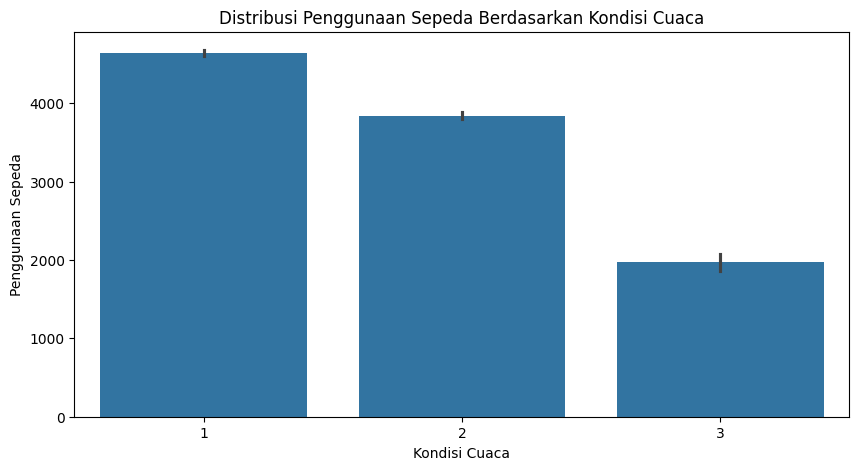

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(data=merge_df, x='weathersit_x', y='cnt_x')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Penggunaan Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.show()

### Pertanyaan 2: Apakah terdapat hari-hari atau periode tertentu dengan lonjakan penggunaan sepeda?

In [28]:
# Menghitung total penggunaan sepeda per hari
daily_usage = merge_df.groupby('dteday')['cnt_x'].sum().reset_index()

# Mengambil informasi hari dalam seminggu
daily_usage['day_of_week'] = daily_usage['dteday'].dt.day_name()

# Menghitung rata-rata penggunaan sepeda per hari dalam seminggu
weekly_usage = daily_usage.groupby('day_of_week')['cnt_x'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


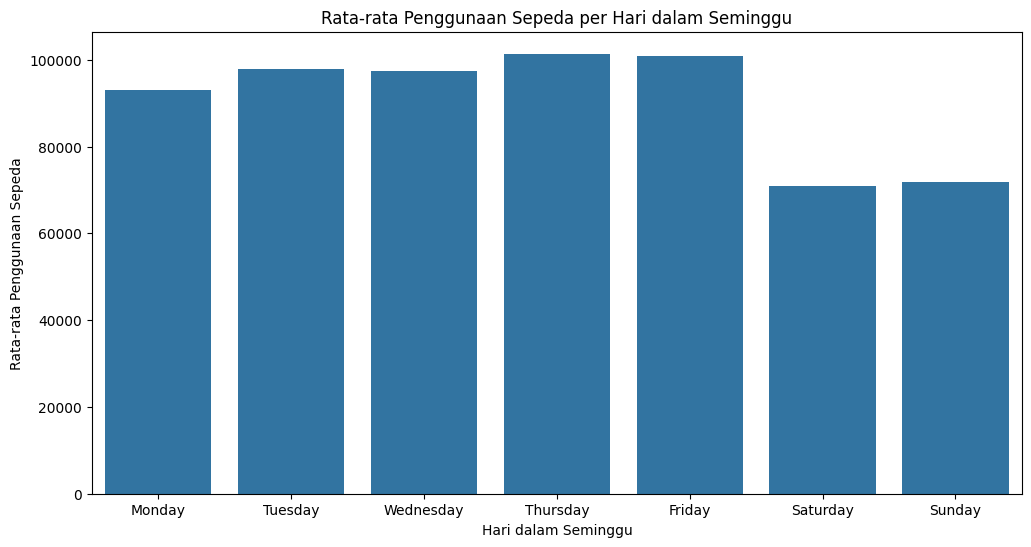

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_usage.index, y=weekly_usage.values)
plt.title('Rata-rata Penggunaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.show()

## Conclusion

- Kesimpulan dari pertanyaan 1 adalah distribusi penggunaan sepeda lebih banyak ketika angka pada kolom weathersit semakin kecil (penggunaan pada weathersit 1 > penggunaan pada weathersit 2 > penggunaan pada weathersit 3). Hal ini menunjukkan bahwa semakin kecil angka pada dataset semakin banyak pengguna memakai sepeda. Angka tersebut juga merepresentasikan kondisi cuaca, semakin kecil angka sebakin bagus cuaca nya.
- Kesimpulan dari pertanyaan 2 adalah rata-rata penggunaan sepeda pada hari kerja (senin-jumat) jauh lebih besar dibandingkan dengan hari libur (sabtu-ahad).